## Implementing Gradient Boosting on Classification Dataset

In [85]:
import numpy as np 
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import math
import matplotlib.pyplot as plt

In [86]:
data = load_breast_cancer()
X = data.data
y = data.target

In [87]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
df["target"] = y

In [89]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [90]:
mean = df["target"].mean()

In [91]:
df["pred1"] = math.log(mean/(1-mean))

In [92]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,target,pred1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0.52115
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0.52115
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0.52115
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0.52115
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0.52115


In [93]:
def prob_fn(val):
    return 1/(1+math.exp(-val))

df["pred1(prob)"] = df["pred1"].apply(prob_fn)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,target,pred1,pred1(prob)
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0.52115,0.627417
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0.52115,0.627417
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0.52115,0.627417
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0.52115,0.627417
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0.52115,0.627417


In [94]:
df["res1"] = df["pred1(prob)"] - df["target"]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,target,pred1,pred1(prob),res1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0.52115,0.627417,0.627417
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0.52115,0.627417,0.627417
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0.52115,0.627417,0.627417
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0.52115,0.627417,0.627417
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0.52115,0.627417,0.627417


In [95]:
X = df.iloc[:, 0:30]
y = df["res1"]
dtree = DecisionTreeRegressor(max_depth=10)
dtree.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


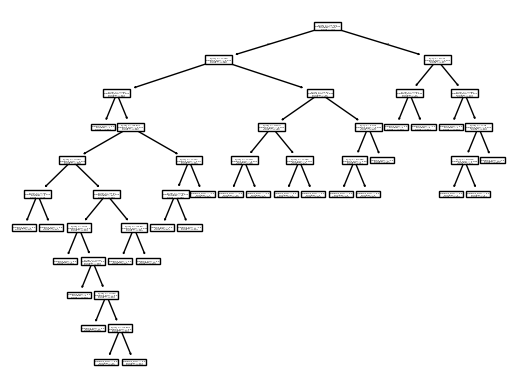

In [96]:
plot_tree(dtree)
plt.show()

In [97]:
df["pred1_labels"] = dtree.apply(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,target,pred1,pred1(prob),res1,pred1_labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,0,0.52115,0.627417,0.627417,43
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,0,0.52115,0.627417,0.627417,50
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,0,0.52115,0.627417,0.627417,50
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.8663,0.6869,0.2575,0.6638,0.17300,0,0.52115,0.627417,0.627417,39
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.2050,0.4000,0.1625,0.2364,0.07678,0,0.52115,0.627417,0.627417,43


In [99]:
gammas = {}
for j in df["pred1_labels"].unique():
    rows = df[df["pred1_labels"]==j]
    num = rows["res1"].sum()
    den = ((rows["pred1(prob)"]* (1-rows["pred1(prob)"]))).sum()
    gamma = num / den

    gammas[j] = gamma

df["gamma"] = df["pred1_labels"].map(gammas)

    

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,target,pred1,pred1(prob),res1,pred1_labels,gamma,pred2
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.1860,0.2750,0.08902,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.2430,0.3613,0.08758,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,0.1932,0.3063,0.08368,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,0.1556,0.3196,0.11510,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,0.1810,0.3792,0.10480,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.0,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,0.2542,0.2929,0.09873,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
564,21.56,22.39,142.0,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.2216,0.2060,0.07115,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
565,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.1628,0.2572,0.06637,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
566,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.1418,0.2218,0.07820,0,0.52115,0.627417,0.627417,50,2.683962,0.936385


In [100]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,target,pred1,pred1(prob),res1,pred1_labels,gamma
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.7119,0.2654,0.4601,0.11890,0,0.52115,0.627417,0.627417,43,2.683962
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2416,0.1860,0.2750,0.08902,0,0.52115,0.627417,0.627417,50,2.683962
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4504,0.2430,0.3613,0.08758,0,0.52115,0.627417,0.627417,50,2.683962
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6869,0.2575,0.6638,0.17300,0,0.52115,0.627417,0.627417,39,2.683962
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.4000,0.1625,0.2364,0.07678,0,0.52115,0.627417,0.627417,43,2.683962


In [ ]:
def probab(val):
    return 1/(1+math.exp(-val))

df["pred2"] = df["gamma"] + (0.01) * df["pred1"]
df["pred2"] = df["pred2"].apply(probab)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,target,pred1,pred1(prob),res1,pred1_labels,gamma,pred2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.2654,0.4601,0.11890,0,0.52115,0.627417,0.627417,43,2.683962,0.936385
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1860,0.2750,0.08902,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.2430,0.3613,0.08758,0,0.52115,0.627417,0.627417,50,2.683962,0.936385
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2575,0.6638,0.17300,0,0.52115,0.627417,0.627417,39,2.683962,0.936385
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1625,0.2364,0.07678,0,0.52115,0.627417,0.627417,43,2.683962,0.936385


In [102]:
df["pred2"].values

array([0.93638478, 0.93638478, 0.93638478, 0.93638478, 0.93638478,
       0.93638478, 0.93638478, 0.93638478, 0.93638478, 0.93638478,
       0.93638478, 0.93638478, 0.93638478, 0.93638478, 0.93638478,
       0.93638478, 0.93638478, 0.93638478, 0.93638478, 0.16957729,
       0.16957729, 0.16957729, 0.93638478, 0.93638478, 0.93638478,
       0.93638478, 0.93638478, 0.93638478, 0.93638478, 0.93638478,
       0.93638478, 0.93638478, 0.93638478, 0.93638478, 0.93638478,
       0.93638478, 0.93638478, 0.16957729, 0.93638478, 0.93638478,
       0.93638478, 0.93638478, 0.93638478, 0.93638478, 0.93638478,
       0.93638478, 0.16957729, 0.93638478, 0.16957729, 0.16957729,
       0.16957729, 0.16957729, 0.16957729, 0.93638478, 0.93638478,
       0.16957729, 0.93638478, 0.93638478, 0.16957729, 0.16957729,
       0.16957729, 0.16957729, 0.93638478, 0.16957729, 0.93638478,
       0.93638478, 0.16957729, 0.16957729, 0.16957729, 0.16957729,
       0.93638478, 0.16957729, 0.93638478, 0.93638478, 0.16957

In [111]:
df["res2"] = df["pred2"] - df["target"]

In [112]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,target,pred1,pred1(prob),res1,pred1_labels,gamma,pred2,res2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.4601,0.11890,0,0.52115,0.627417,0.627417,43,2.683962,0.936385,0.936385
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2750,0.08902,0,0.52115,0.627417,0.627417,50,2.683962,0.936385,0.936385
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.3613,0.08758,0,0.52115,0.627417,0.627417,50,2.683962,0.936385,0.936385
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6638,0.17300,0,0.52115,0.627417,0.627417,39,2.683962,0.936385,0.936385
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.2364,0.07678,0,0.52115,0.627417,0.627417,43,2.683962,0.936385,0.936385


In [113]:
dtree2 = DecisionTreeRegressor(max_depth=10)
X = df.iloc[:, 0:30]
y = df["res2"]
dtree2.fit(X, y)
df["pred2_labels"] = dtree2.apply(X) #get the labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,target,pred1,pred1(prob),res1,pred1_labels,gamma,pred2,res2,pred2_labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.11890,0,0.52115,0.627417,0.627417,43,2.683962,0.936385,0.936385,45
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.08902,0,0.52115,0.627417,0.627417,50,2.683962,0.936385,0.936385,64
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.08758,0,0.52115,0.627417,0.627417,50,2.683962,0.936385,0.936385,64
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.17300,0,0.52115,0.627417,0.627417,39,2.683962,0.936385,0.936385,39
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.07678,0,0.52115,0.627417,0.627417,43,2.683962,0.936385,0.936385,45


In [115]:
gammas = {}
for i in df["pred2_labels"].unique():
    rows = df[df["pred2_labels"] == i]
    num = rows["res2"].sum() #summation(res)
    den = (rows["pred2"] * (1-rows["pred2"])).sum() #summation(p*(1-p))
    gamma = num/den
    
    gammas[i] = gamma

df["gamma2"] = df["pred2_labels"].map(gammas)

In [116]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,target,pred1,pred1(prob),res1,pred1_labels,gamma,pred2,res2,pred2_labels,gamma2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0,0.52115,0.627417,0.627417,43,2.683962,0.936385,0.936385,45,15.719509
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0,0.52115,0.627417,0.627417,50,2.683962,0.936385,0.936385,64,15.719509
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0,0.52115,0.627417,0.627417,50,2.683962,0.936385,0.936385,64,15.719509
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0,0.52115,0.627417,0.627417,39,2.683962,0.936385,0.936385,39,15.719509
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0,0.52115,0.627417,0.627417,43,2.683962,0.936385,0.936385,45,15.719509


In [118]:
def log_odds2Prob(val):
    return 1/(1+math.exp(-val))

df["pred3"] = df["gamma"] + (0.1) * df["gamma2"]
df["pred3"] = df["pred3"].apply(log_odds2Prob)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,pred1,pred1(prob),res1,pred1_labels,gamma,pred2,res2,pred2_labels,gamma2,pred3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.52115,0.627417,0.627417,43,2.683962,0.936385,0.936385,45,15.719509,0.986018
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.52115,0.627417,0.627417,50,2.683962,0.936385,0.936385,64,15.719509,0.986018
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.52115,0.627417,0.627417,50,2.683962,0.936385,0.936385,64,15.719509,0.986018
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.52115,0.627417,0.627417,39,2.683962,0.936385,0.936385,39,15.719509,0.986018
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.52115,0.627417,0.627417,43,2.683962,0.936385,0.936385,45,15.719509,0.986018
